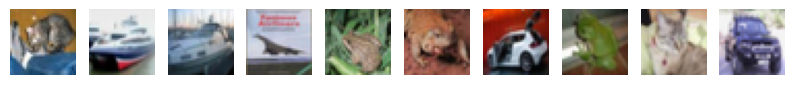

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/20
1563/1563 [==============================] - 167s 106ms/step - loss: 1.5915 - accuracy: 0.4474 - val_loss: 1.3647 - val_accuracy: 0.5106
Epoch 2/20
1563/1563 [==============================] - 164s 105ms/step - loss: 1.2562 - accuracy: 0.5536 - val_loss: 1.0480 - val_accuracy: 0.6209
Epoch 3/20
 904/1563 [================>.............] - ETA: 1:04 - loss: 1.1419 - accuracy: 0.5979

In [ ]:
import requests
import tarfile
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from six.moves import cPickle
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing import image

# Download and extract the CIFAR-10 dataset
cifar_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
response = requests.get(cifar_url, stream=True)
with tarfile.open(fileobj=response.raw, mode="r:gz") as tar:
    tar.extractall("/content/cifar-10")

# Path to the CIFAR-10 dataset folder
dataset_path = "/content/cifar-10/cifar-10-batches-py"
test_batch_file = f"{dataset_path}/test_batch"
if not os.path.exists(test_batch_file):
    raise FileNotFoundError(f"The file '{test_batch_file}' does not exist. Please check the dataset path.")

# Load CIFAR-10 batch file function
def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        datadict = cPickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
        Y = np.array(Y)
    return X, Y

# Load the test batch
Imdata, train_labels = load_cifar_batch(test_batch_file)

# Display the first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(Imdata[i])
    plt.axis('off')
plt.show()

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the learning rate and regularization parameters
learning_rate = 0.0001
use_l2_reg = False
l2_loss_lambda = 0.0002
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=l2))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')
plt.show()

model.save("cifar10_model.h5")

loaded_model = load_model("cifar10_model.h5")

img_path = r"C:\Users\Goku's Here\Desktop.jpg"
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = loaded_model.predict(img_array)

predicted_class_index = np.argmax(predictions[0])
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_label = class_labels[predicted_class_index]

print(f"The predicted class is: {predicted_class_label}")
